In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
songs = pd.read_csv('./data/songs.csv')
users = pd.read_csv('./data/members.csv')

In [3]:
train = pd.merge(train, songs, how='left', on='song_id')
test = pd.merge(test, songs, how='left', on='song_id')

In [4]:
train = pd.merge(train, users, how='left', on='msno')
test = pd.merge(test, users, how='left', on='msno')

In [5]:
def encode_column(col_name):
    train[col_name] = train[col_name].astype(str)
    test[col_name] = test[col_name].astype(str)
    encoder = LabelEncoder()
    encoder.fit(train[col_name].append(test[col_name]))
    train[col_name] = encoder.transform(train[col_name])
    test[col_name] = encoder.transform(test[col_name])
    return int(max(train[col_name].max(), test[col_name].max()) + 1)

In [6]:
def encode_skewed(col_name):
    train[col_name+'_invalid'] = train[col_name] <= 1
    train[col_name+'_invalid'].astype(int)
    
    test[col_name+'_invalid'] = test[col_name] <= 1
    test[col_name+'_invalid'].astype(int)
    
    train[col_name+'_norm'] = np.log(np.maximum(1, train[col_name]))
    test[col_name+'_norm'] = np.log(np.maximum(1, test[col_name]))
    
    encoder = StandardScaler()
    data = train[col_name+'_norm'][train[col_name+'_norm'] > 0].append(test[col_name+'_norm'][test[col_name+'_norm'] > 0])
    encoder.fit(data.values.reshape(-1, 1))
    
    train[col_name+'_norm'] = encoder.transform(train[col_name+'_norm'].values.reshape(-1, 1))
    test[col_name+'_norm'] = encoder.transform(test[col_name+'_norm'].values.reshape(-1, 1))
    
    train[col_name+'_norm'] = train[col_name+'_norm'].apply(lambda x: 0 if x <= -10 else x)
    test[col_name+'_norm'] = test[col_name+'_norm'].apply(lambda x: 0 if x <= -10 else x)
    
    train[col_name+'_norm'].hist(bins=100)
    test[col_name+'_norm'].hist(bins=100)
    plt.show()

In [7]:
def encode_song_length():
    col_name = 'song_length'
    
    train[col_name] = train[col_name].fillna(0)
    test[col_name] = test[col_name].fillna(0)
    
    encoder = StandardScaler()
    data = train['song_length'].append(test['song_length'])
    encoder.fit(data.values.reshape(-1, 1))

    train[col_name+'_norm'] = encoder.transform(train[col_name].values.reshape(-1, 1))
    test[col_name+'_norm'] = encoder.transform(test[col_name].values.reshape(-1, 1))
    
    train[col_name+'_norm'].hist(bins=100)
    test[col_name+'_norm'].hist(bins=100)
    
    plt.show()

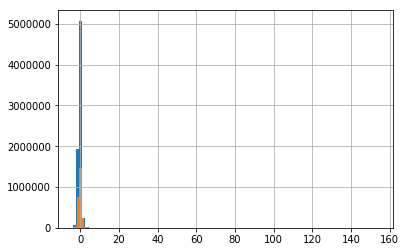

In [8]:
encode_song_length()

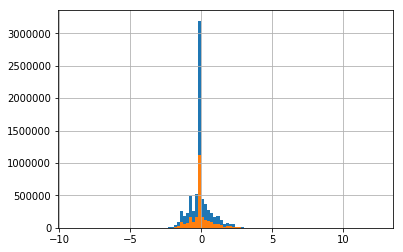

In [9]:
encode_skewed('bd')

In [10]:
SONG_FEAT = ['song_id', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
USER_FEAT = [ 'msno', 'city', 'gender', 'registered_via', 'bd_invalid']
SOURCE_FEAT = ['source_system_tab', 'source_screen_name', 'source_type']

label_columns = SOURCE_FEAT + SONG_FEAT + USER_FEAT
label_count = {}
for k in label_columns:
    print('Encoding {}...'.format(k))
    label_count[k] = encode_column(k)

Encoding source_system_tab...
Encoding source_screen_name...
Encoding source_type...
Encoding song_id...
Encoding genre_ids...
Encoding artist_name...
Encoding composer...
Encoding lyricist...
Encoding language...
Encoding msno...
Encoding city...
Encoding gender...
Encoding registered_via...
Encoding bd_invalid...


In [11]:
train.to_csv('data/train_features.csv')
test.to_csv('data/test_features.csv')